<a href="https://colab.research.google.com/github/WahyuKhairi06/TextMining_WahyuKhairi_2311531009/blob/main/TextMining_WahyuKhairi_2311531009_id.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bahasa Indonesia**

In [31]:
from google.colab import drive
import pandas as pd
import numpy as np
import re
import os
from collections import Counter

# Mount Google Drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Informatika/SMT 5/Text Mining/Pendidikan(TM).csv'

df_id = pd.read_csv(dataset_path)
df_id.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1964478664919413219,Sat Sep 06 23:59:46 +0000 2025,0,ngingetin gw dengan 1 channel yt universitas (...,1964478664919413219,NaN,NaN,in,NaN,0,1,0,https://x.com/undefined/status/196447866491941...,1810681860386922496,NaN
1,1964478269551759727,Sat Sep 06 23:58:12 +0000 2025,0,sedih gasi andai nih dana sebanyak ini lebih m...,1964478269551759727,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/196447826955175...,1183039998104199168,NaN
2,1964477937245442462,Sat Sep 06 23:56:53 +0000 2025,0,Perusak dunia pendidikan indonesia https://t.c...,1964477937245442462,https://pbs.twimg.com/media/G0M6RCga8AEGwL0.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/196447793724544...,1325768258071351298,NaN
3,1964310381817442541,Sat Sep 06 23:56:19 +0000 2025,0,@KotaNusantara Presiden Prabowo fokus ke pendi...,1964477797294092473,NaN,KotaNusantara,in,NaN,0,0,0,https://x.com/undefined/status/196447779729409...,1542898369684594688,NaN
4,1964310221683102151,Sat Sep 06 23:54:24 +0000 2025,0,@GenZNusantara Presiden Prabowo sukses bikin f...,1964477313095217245,NaN,GenZNusantara,in,NaN,0,0,0,https://x.com/undefined/status/196447731309521...,1522518299187195905,NaN


In [32]:
# Try optional libraries
try:
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    sastrawi_available = True
except Exception:
    sastrawi_available = False

from IPython.display import display

# Detect text column (prefer 'full_text' or 'text' or similar)
text_col_candidates = [c for c in df_id.columns if c.lower() in {"full_text","text","tweet","content","raw_text","body"} or "text" in c.lower()]
if text_col_candidates:
    # prefer full_text then text
    if "full_text" in df_id.columns:
        text_col = "full_text"
    elif "text" in df_id.columns:
        text_col = "text"
    else:
        text_col = text_col_candidates[0]
else:
    object_cols = [c for c in df_id.columns if df_id[c].dtype == "object"]
    text_col = object_cols[0] if object_cols else df_id.columns[0]

work_id = df_id.copy().rename(columns={text_col: "raw_text"})
work_id["raw_text"] = work_id["raw_text"].astype(str)
work_id = work_id[work_id["raw_text"].str.strip().ne("")].copy().reset_index(drop=True)

In [33]:
# ---------- 1) Case folding ----------
work_id["lower"] = work_id["raw_text"].str.lower()

In [34]:
# ---------- 2) Cleaning ----------
url_pattern = re.compile(r"http\S+|www\.\S+")
mention_pattern = re.compile(r"@[\w_]+")
hashtag_pattern = re.compile(r"#[\w_]+")
emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"
    u"\U0001F300-\U0001F5FF"
    u"\U0001F680-\U0001F6FF"
    u"\U0001F1E0-\U0001F1FF"
    u"\U00002700-\U000027BF"
    u"\U000024C2-\U0001F251"
    "]+", flags=re.UNICODE
)
punct_pattern = re.compile(r"[^\w\s']")  # keep apostrophes if any inside words

def clean_text_id(s: str) -> str:
    s = url_pattern.sub(" ", s)
    s = mention_pattern.sub(" ", s)
    s = hashtag_pattern.sub(" ", s)
    s = emoji_pattern.sub(" ", s)
    s = punct_pattern.sub(" ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

work_id["clean"] = work_id["lower"].map(clean_text_id)

In [35]:
# ---------- 3) Tokenization ----------
token_pattern = re.compile(r"\b\w+\b", flags=re.UNICODE)
def tokenize(s: str):
    return token_pattern.findall(s)

work_id["tokens"] = work_id["clean"].map(tokenize)

In [36]:
# ---------- 4) Normalisasi kata tidak baku (Indonesia) ----------
normalize_map_id = {
    "gk": "tidak",
    "gak": "tidak",
    "ga": "tidak",
    "tdk": "tidak",
    "yg": "yang",
    "dgn": "dengan",
    "dg": "dengan",
    "klo": "kalau",
    "kalo": "kalau",
    "kpn": "kapan",
    "brp": "berapa",
    "jgn": "jangan",
    "aja": "saja",
    "bgt": "banget",
    "sy": "saya",
    "gw": "saya",
    "gue": "saya",
    "sm": "sama",
    "udh": "sudah",
    "blm": "belum",
    "dr": "dari",
    "drpd": "daripada",
    "tp": "tapi",
    "tpi": "tapi",
    "kya": "seperti",
    "skrg": "sekarang",
    "bbrp": "beberapa",
    "hrs": "harus",
    "sbg": "sebagai",
    "kl": "kalau",
    "mksh": "terima kasih",
    "mkshk": "terima kasih",
    "makasih": "terima kasih",
    "nih": "ini"
}

def normalize_tokens_id(tokens):
    out = []
    for t in tokens:
        mapped = normalize_map_id.get(t, t)
        # if mapping contains spaces (expansion), split into tokens
        out.extend(mapped.split())
    return out

work_id["tokens_norm"] = work_id["tokens"].map(normalize_tokens_id)

In [37]:
# ---------- 5) Stopword removal (Bahasa Indonesia) ----------
# A curated Indonesian stopword set (common words). This is used if no external stopword package is available.
ind_stopwords = {
    "yang","dan","di","ke","dari","ini","itu","ada","sebagai","dengan","pada","untuk","karena","juga","adalah",
    "atau","oleh","lagi","lebih","saat","setelah","sebelum","tanpa","mereka","kami","kita","saya","aku","dia","ke","dari","pada",
    "dalam","seorang","sebuah","itu","apa","siapa","mengapa","bagaimana","dimana","kapan","kenapa","agar","supaya","maupun",
    "meskipun","sehingga","hingga","melainkan","bahwa","ini","itu","itu","adanya","adalah","juga","telah","akan","harus","jadi",
    "jadi","apa","masih","sampai","sudah","belum","pun","sejak","hingga","saja","lagi","lagi","masing","setiap","lain","lainnya",
    "tersebut","terhadap","antara","lebih","kurang","oleh","demi","selain","kebanyakan","kebanyakan","namun","tetapi","tapi","tp",
    "bagi","banyak","sedikit","beberapa","bukan","guna","oleh","guna","guna","supaya","agar"
}
# include normalized terms that are stopwords like 'tidak', 'sudah', 'belum'
ind_stopwords.update({"tidak","sudah","belum","akan","harus","dapat","bisa","boleh"})
# Simple function to remove stopwords and numeric tokens
def remove_stopwords_id(tokens):
    return [t for t in tokens if (t not in ind_stopwords) and (not t.isdigit())]

work_id["tokens_nostop"] = work_id["tokens_norm"].map(remove_stopwords_id)

In [38]:
# ---------- 6) Stemming ----------
if sastrawi_available:
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    def stem_tokens_id(tokens):
        # Sastrawi works best on phrases; stem token-by-token for safety
        return [stemmer.stem(t) for t in tokens]
else:
    # Fallback simplistic Indonesian stemmer: remove common prefixes/suffixes heuristically
    prefix_patterns = ["meng","meny","men","mem","me","peng","peny","pen","pem","di","ke","se","ber","be","per","pe","ter"]
    suffix_patterns = ["an","i","an","nya","lah","kah"]
    def simple_stem(t):
        original = t
        # remove suffixes first
        changed = True
        # iterative remove suffixes
        for suf in suffix_patterns:
            if t.endswith(suf) and len(t) - len(suf) >= 3:
                t = t[:-len(suf)]
                break
        # remove prefixes once
        for pre in prefix_patterns:
            if t.startswith(pre) and len(t) - len(pre) >= 3:
                t = t[len(pre):]
                break
        if t == "":
            return original
        return t
    def stem_tokens_id(tokens):
        return [simple_stem(t) for t in tokens]

work_id["tokens_stem"] = work_id["tokens_nostop"].map(stem_tokens_id)


In [39]:
# ---------- 7) Summaries ----------
work_id["len_tokens_before"] = work_id["tokens"].map(len)
work_id["len_tokens_after"] = work_id["tokens_stem"].map(len)

summary_id = {
    "rows": len(work_id),
    "columns": list(df_id.columns),
    "chosen_text_column": text_col,
    "avg_tokens_before": float(np.mean(work_id["len_tokens_before"])) if len(work_id) else 0.0,
    "avg_tokens_after": float(np.mean(work_id["len_tokens_after"])) if len(work_id) else 0.0,
    "n_empty_after_clean": int((work_id["clean"].str.len() == 0).sum())
}

In [40]:
# ---------- 8) Top term frequencies (after preprocessing) ----------
all_tokens_id = [t for tokens in work_id["tokens_stem"] for t in tokens]
freq_id = Counter(all_tokens_id)
top_terms_id = pd.DataFrame(freq_id.most_common(30), columns=["term", "freq"])

In [41]:
# ---------- 9) Save outputs ----------
out_dir = "/mnt/data"
os.makedirs(out_dir, exist_ok=True)

out_cols = ["raw_text","clean","tokens","tokens_norm","tokens_nostop","tokens_stem","len_tokens_before","len_tokens_after"]
save_df = work_id[out_cols].copy()
for c in ["tokens","tokens_norm","tokens_nostop","tokens_stem"]:
    save_df[c] = save_df[c].apply(lambda x: " ".join(x) if isinstance(x, (list,tuple)) else str(x))

preprocessed_path_id = os.path.join(out_dir, "pendidikan_preprocessed_id.csv")
save_df.to_csv(preprocessed_path_id, index=False, encoding="utf-8")

sample_path_id = os.path.join(out_dir, "pendidikan_sample_preview.csv")
work_sample_id = work_id.head(20)[["raw_text","clean","tokens","tokens_stem"]].copy()
for c in ["tokens","tokens_stem"]:
    work_sample_id[c] = work_sample_id[c].apply(lambda x: " ".join(x) if isinstance(x, (list,tuple)) else str(x))
work_sample_id.to_csv(sample_path_id, index=False, encoding="utf-8")

examples_path_id = os.path.join(out_dir, "pendidikan_id_examples_for_report.csv")
examples = work_id[["raw_text","clean","tokens_stem"]].drop_duplicates(subset=["raw_text"]).head(50).copy()
examples["tokens_stem"] = examples["tokens_stem"].apply(lambda x: " ".join(x) if isinstance(x, (list,tuple)) else str(x))
examples.to_csv(examples_path_id, index=False, encoding="utf-8")

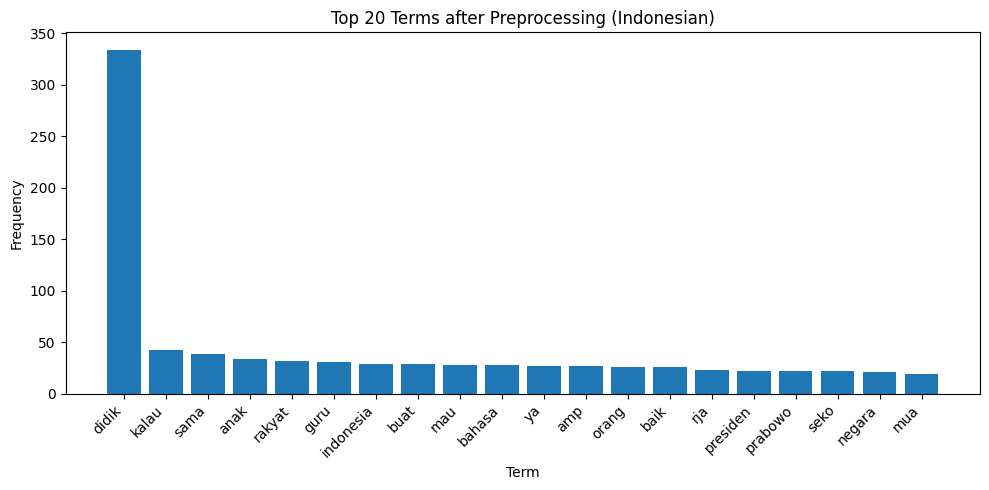

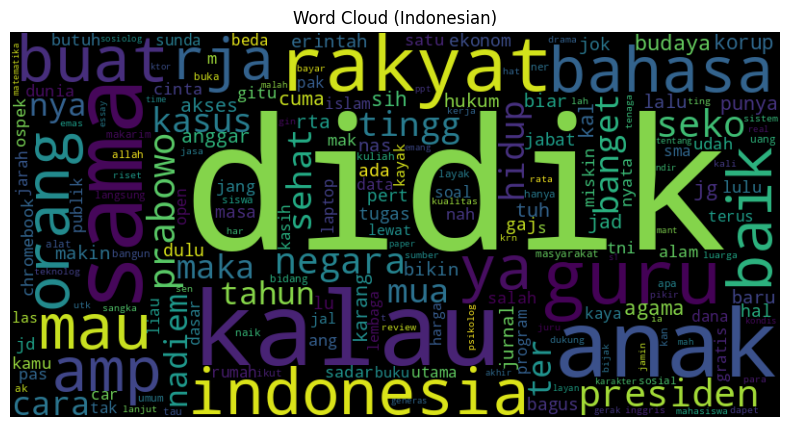

'Preview - Pendidikan (clean & stem) - first 50 rows'

,raw_text,clean,tokens,tokens_stem
0,ngingetin gw dengan 1 channel yt universitas (...,ngingetin gw dengan 1 channel yt universitas k...,"[ngingetin, gw, dengan, 1, channel, yt, univer...","[ngingetin, channel, yt, universitas, kayak, p..."
1,sedih gasi andai nih dana sebanyak ini lebih m...,sedih gasi andai nih dana sebanyak ini lebih m...,"[sedih, gasi, andai, nih, dana, sebanyak, ini,...","[dih, gas, anda, dana, banyak, tingin, didik]"
2,Perusak dunia pendidikan indonesia https://t.c...,perusak dunia pendidikan indonesia,"[perusak, dunia, pendidikan, indonesia]","[usak, dunia, didik, indonesia]"
3,@KotaNusantara Presiden Prabowo fokus ke pendi...,presiden prabowo fokus ke pendidikan dengan se...,"[presiden, prabowo, fokus, ke, pendidikan, den...","[presiden, prabowo, fokus, didik, seko, rakyat..."
4,@GenZNusantara Presiden Prabowo sukses bikin f...,presiden prabowo sukses bikin fenomena baru di...,"[presiden, prabowo, sukses, bikin, fenomena, b...","[presiden, prabowo, sukses, bikin, fenomena, b..."
5,@uppifess ada yang mau buku pengantar pendidik...,ada yang mau buku pengantar pendidikan aku pl ...,"[ada, yang, mau, buku, pengantar, pendidikan, ...","[mau, buku, antar, didik, pl, in, harga, under..."
6,Dijual/ Disewa rumah dengan lokasi strategis d...,dijual disewa rumah dengan lokasi strategis di...,"[dijual, disewa, rumah, dengan, lokasi, strate...","[jual, sewa, rumah, lokas, strategis, pinggir,..."
7,@y_seriously_y @Leofs17 @KangManto123 Negarany...,negaranya soalnya jauuuuuuuuh berbeda cuma dia...,"[negaranya, soalnya, jauuuuuuuuh, berbeda, cum...","[negara, soal, jauuuuuuuuh, beda, cuma, kaga, ..."
8,Nadiem Makarim Menteri Pendidikan yang Jadi Te...,nadiem makarim menteri pendidikan yang jadi te...,"[nadiem, makarim, menteri, pendidikan, yang, j...","[nadiem, makarim, ter, didik, sangka, kasus, k..."
9,Open jasa terawang. Melayani pertanyaan seputa...,open jasa terawang melayani pertanyaan seputar...,"[open, jasa, terawang, melayani, pertanyaan, s...","[open, jasa, awang, layan, tanya, putar, cinta..."


({'rows': 314,
  'columns': ['conversation_id_str',
   'created_at',
   'favorite_count',
   'full_text',
   'id_str',
   'image_url',
   'in_reply_to_screen_name',
   'lang',
   'location',
   'quote_count',
   'reply_count',
   'retweet_count',
   'tweet_url',
   'user_id_str',
   'username'],
  'chosen_text_column': 'full_text',
  'avg_tokens_before': 26.203821656050955,
  'avg_tokens_after': 20.39171974522293,
  'n_empty_after_clean': 0},
 '/mnt/data/pendidikan_preprocessed_id.csv',
 '/mnt/data/pendidikan_sample_preview.csv',
 '/mnt/data/pendidikan_id_examples_for_report.csv',
         term  freq
 0      didik   334
 1      kalau    42
 2       sama    38
 3       anak    34
 4     rakyat    32
 5       guru    31
 6  indonesia    29
 7       buat    29
 8        mau    28
 9     bahasa    28)

In [42]:
# ---------- 10) Visualizations (matplotlib; single plots) ----------
import matplotlib.pyplot as plt

# Bar chart: Top 20 terms
top20_id = freq_id.most_common(20)
terms_id = [t for t,_ in top20_id]
counts_id = [c for _,c in top20_id]

plt.figure(figsize=(10,5))
plt.bar(terms_id, counts_id)
plt.title("Top 20 Terms after Preprocessing (Indonesian)")
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Try generating a wordcloud if WordCloud is available
try:
    from wordcloud import WordCloud
    wc_text = " ".join(all_tokens_id)
    wc = WordCloud(width=800, height=400, background_color=None, collocations=False).generate(wc_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud (Indonesian)")
    plt.show()
except Exception:
    # if WordCloud not available, skip silently
    pass

# Display preview table for user
display("Preview - Pendidikan (clean & stem) - first 50 rows", work_id.head(50)[["raw_text","clean","tokens","tokens_stem"]])

# Return summary and file paths
(summary_id, preprocessed_path_id, sample_path_id, examples_path_id, top_terms_id[:10])